 Análise Exploratória de Documentos e Selfies
 
  Objetivos:
 - Carregar e visualizar imagens de documentos e selfies
 - Analisar características das imagens
 - Preparar dados para processamento


Carregando .env de: c:\Users\LuizB\OneDrive\Área de Trabalho\Fiap\Cognitive\face-text-extraction\src\.env


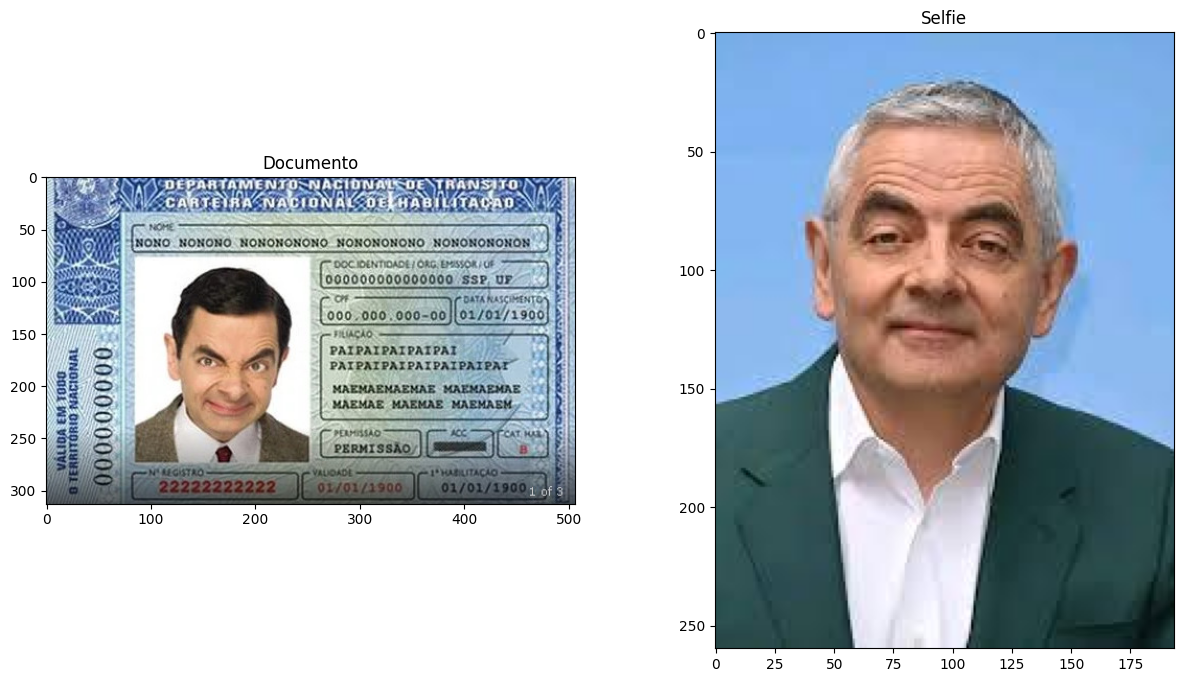

Similaridade: 99.92%
CAT HAR: 
DOC IDENTIDADE/ORG EMISSOR / OF: 000000000000000 SSP. UF
FILIAÇÃO: PAIPAIPAIPAIPAT PAIPAIPAIPAIPAIPAIPAT MAEMAEMAE MAEMAE MAEMAE MAEMAEM
N° REGISTRO: 22222222222
PERMISSAO: PERMISSÃO
DATA NASCIMENTO: 01/01/1900
NOME: NONO NONONO NONONONONO NONONONONO NONONONONON
1" HABILITACAO: 01/01/1900
CPF: 000.000.000-00
VALIDADE: 01/01/1900


In [3]:
# %% [markdown]
# --- Importações ---

import os
import sys
import cv2
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Ajuste dos caminhos do projeto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

dotenv_path = os.path.join(src_path, '.env')
print(f"Carregando .env de: {dotenv_path}")
load_dotenv(dotenv_path)

from aws_services import get_rekognition_client
from utils import display_image, analyze_image_properties
from face_processing import extract_faces, compare_faces
from text_processing import extract_document_text

# %% [markdown]
# --- Carregamento das Imagens ---

# Carrega imagens
doc_img = cv2.imread('../data/samples/documents/been.jpeg')
selfie_img = cv2.imread('../data/samples/selfies/been.jpeg')

# Exibe as imagens
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(cv2.cvtColor(doc_img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Documento')
ax[1].imshow(cv2.cvtColor(selfie_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Selfie')
plt.show()


def image_to_bytes(image, ext='.jpg'):
    _, buffer = cv2.imencode(ext, image)
    return buffer.tobytes()

rekognition = get_rekognition_client()

doc_faces = extract_faces(image_to_bytes(doc_img), rekognition_client=rekognition)
selfie_faces = extract_faces(image_to_bytes(selfie_img), rekognition_client=rekognition)

if doc_faces and selfie_faces:
    similarity = compare_faces(doc_faces[0], selfie_faces[0], rekognition_client=rekognition, threshold=90)
    print(f"Similaridade: {similarity:.2f}%")
else:
    print("Não foi possível detectar faces em uma das imagens.")


doc_bytes = image_to_bytes(doc_img)
extracted_text = extract_document_text(doc_bytes)
for key, value in extracted_text.items():
    print(f"{key}: {value}")
